# The existance of warming trends in the near surface air temperature



- Based on very simple visualization methods, we will look for any possible warming trends in the world's daily averaged anomaly data set from http://berkeleyearth.org/. Temperatures are in Celsius and reported as anomalies relative to the<span style="color:red"> Jan 1951-Dec 1980</span> average.  Uncertainties represent the 95% confidence interval for statistical noise and spatial undersampling effects.  Such uncertainties are expected to account for the effects of random noise as well as random biases affecting station trends and random shifts in station baselines.  The analysis framework is expected to be robust against most forms of bias; however, the impact of some forms of possible systematic bias is still being studied.


- Here we use daily averages and the related uncertainty presented in the dataset. 





## importing the libraries 

In [1]:
import pandas as pd
import io
import requests
#!python -m pip install -U pip --user
#!python -m pip install -U matplotlib --user
import matplotlib.pyplot as plt
import numpy as np


## Reading the Data from online source for selected country

In [2]:
Country = "United States"
#Country="Germany"
#Country="China"
#Country="Australia"
#Country="Nigeria"
url="http://berkeleyearth.lbl.gov/auto/Regional/TAVG/Text/"+Country.lower().replace(" ", "-")+"-TAVG-Trend.txt"
s=requests.get(url).content

# here skip the headers and read csv data into a DataFrame: 
c=pd.read_csv(io.StringIO(s.decode('utf-8')),delim_whitespace=True, skiprows=69, header=None)


In [3]:
# Sometimes the first row of data starts from other months than January, therefore, we iterate 
# to find the first row starting with january. This will help to builmonthly_temp.Uncertaintyd yearly means or averaging. 
for k in range(0,12):
    if c.iloc[k,1]==1 :
              
        monthly_temp= c.iloc[k:,0:4]
        monthly_temp.columns = ['Year','Month','Anomaly','Uncertainty']
        
        break 
    else:
        k += 1
# A glance at the structure of DataFrame:    
monthly_temp.head()

,Year,Month,Anomaly,Uncertainty
4,1769,1,0.118,4.856
5,1769,2,-0.934,3.311
6,1769,3,-0.342,3.884
7,1769,4,0.783,3.482
8,1769,5,1.824,4.795


## Now we can start ploting! 
-  Anomalies relative to the<span style="color:red"> Jan 1951-Dec 1980</span> average

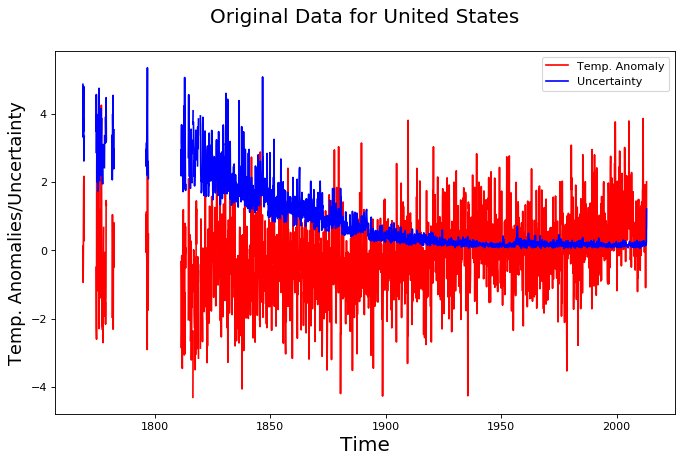

In [4]:
def plot_temp(year,temp,uncer, title):
    '''
    A function to plot our default settings
    year  -> time axis
    temp  -> temperature DataFrame
    uncer -> uncertainty of temp
    '''    
    # For the sake of having ticks for x axis: 
    years = np.linspace(year.min(),year.max() , num=temp.shape[0])
    # To have large figures in jupyter: 
    fig=plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')
    # Plot the monthly anomalies:
    plt.plot(years,temp,'r', label='Temp. Anomaly')
    # Plot the Uncertainties: 
    plt.plot(years,uncer,'b', label='Uncertainty')
    plt.xlabel('Time', fontsize=18)
    plt.ylabel('Temp. Anomalies/Uncertainty', fontsize=16)
    plt.title(title, fontsize=18)
    plt.legend()
    plt.show()
# Now plot it : 
plot_temp(monthly_temp.Year,monthly_temp.Anomaly, monthly_temp.Uncertainty,
          title="Original Data for "+Country+"\n")

## Smoothed time-series using moving average

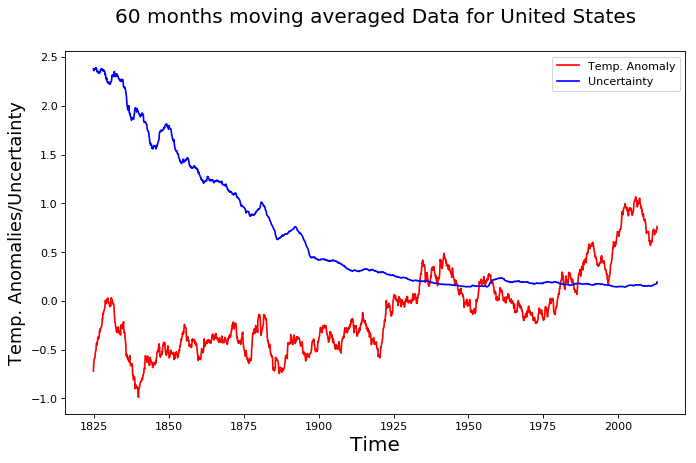

In [5]:
# Now we look at the runnung means of the data:
rolling_mean_anomaly = monthly_temp.Anomaly.rolling(window=60).mean()
rolling_mean_uncertainty = monthly_temp.Uncertainty.rolling(window=60).mean()
plot_temp(monthly_temp.Year,rolling_mean_anomaly, rolling_mean_uncertainty,
          title="60 months moving averaged Data for "+Country+"\n")


## Histogram plots to search for the climatic shifts

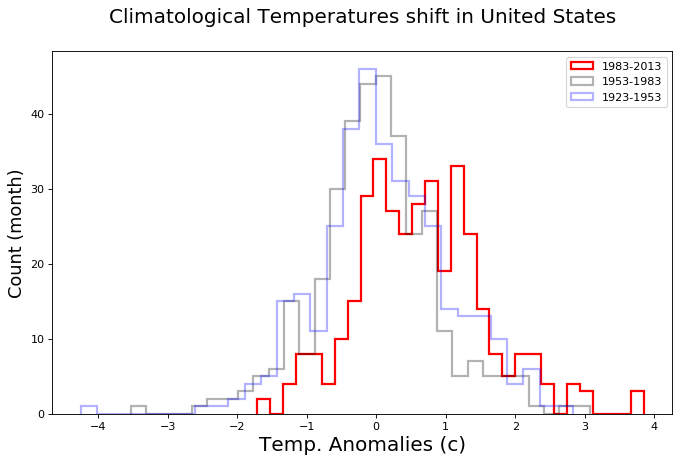

In [6]:
fig=plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.hist(monthly_temp[monthly_temp.Year>1983]['Anomaly'].dropna(),bins=30,
         label='1983-2013', color='red', lw=2,histtype=u'step')
plt.hist(monthly_temp[(monthly_temp.Year<1983) & (monthly_temp.Year>1953)]['Anomaly'].dropna(),
         bins=30, label='1953-1983',color='black',histtype=u'step',lw=2, alpha=.3)
plt.hist(monthly_temp[(monthly_temp.Year<1953) & (monthly_temp.Year>1923)]['Anomaly'].dropna(),
         bins=30, label='1923-1953',color='blue',histtype=u'step', lw=2, alpha=.3)
plt.legend()
plt.xlabel('Temp. Anomalies (c)', fontsize=18)
plt.ylabel('Count (month)', fontsize=16)
plt.title("Climatological Temperatures shift in "+Country+"\n", fontsize=18)
plt.show()